In [1]:
import numpy as np                   # Importing numpy library which we will require later.
import pandas as pd                  # Importing pandas library 
df=pd.read_csv('supermarket sales Sheet1.csv')   # Reading the data
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [2]:
df.isnull().sum()     # Checking for null values

# Since there are no null values,no need to preprocess the data(except removing unwanted columns).

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [3]:
df.dtypes   # Checking the types of columns of data

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [4]:
# Invoice ID,margin percentage are not useful for our analysis,therefore removing them
df=df.drop(columns=['Invoice ID','gross margin percentage'],axis=1)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,30.2085,5.3


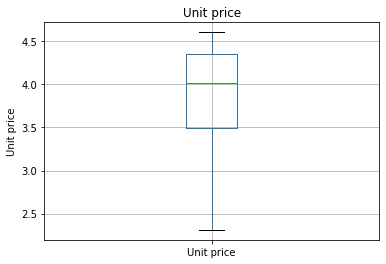

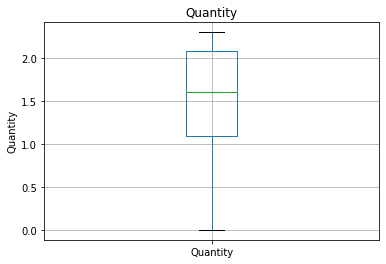

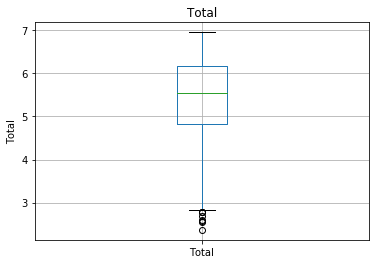

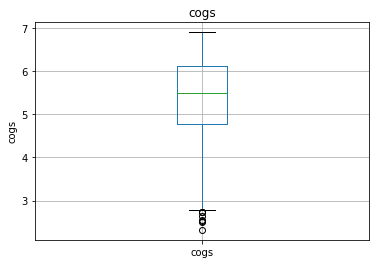

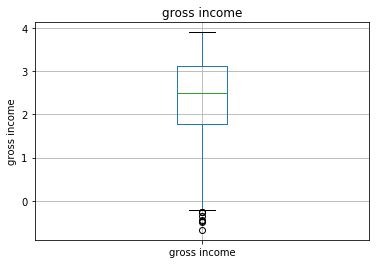

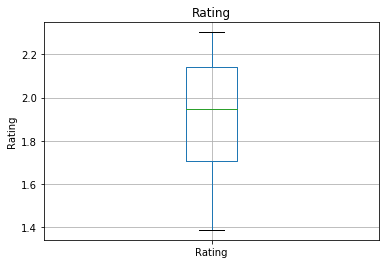

In [5]:
# Extracting numerical features to see if there are any outliers or not.
# If any,we'll first check,are they going to affect our analysis or not

import matplotlib.pyplot as plt     # Importing the matplot library to plot the boxplot for detecting outliers
%matplotlib inline

# Numerical features are those which are not having dtype as object and also excluding Tax 5%(Which is not required for analysis)

numerical_feature=[feature  for feature in df.columns if df[feature].dtypes!='O' and feature not in 'Tax 5%']
for feature in numerical_feature:
    data=df.copy()                                 # Copying the data
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])       # First normalising the data(Feature Scaling)
        data.boxplot(column=feature)               # Plotting a boxplot
        plt.ylabel(feature)                        # Setting y-label
        plt.title(feature)                         # Setting title
        plt.show()
        
# From following Boxplots,'Total','cogs','gross income' are having outliers

In [6]:
# Checking if these outliers are going to affect our analysis or not

for i in numerical_feature:
    quantile1,quantile3=np.percentile(df[i],[25,75])      # Setting 25 and 75 percentile
    iqr=quantile3-quantile1                               # Defining inter-quantile range
    lower_bound=quantile1-(1.5*iqr)                       # Setting lower bound
    upper_bound=quantile3+(1.5*iqr)                       # Setting upper bound
    
    percentage_outlier=len(df[df[i]>upper_bound][i])/df.shape[0]           # Defining percentage outliers
    print('percentage outlier in {} is {}'.format(i,percentage_outlier))   # Printing percentage outliers of each columns.

#Since all the values are lesser than 0.3%,we need not to remove them

percentage outlier in Unit price is 0.0
percentage outlier in Quantity is 0.0
percentage outlier in Total is 0.009
percentage outlier in cogs is 0.009
percentage outlier in gross income is 0.009
percentage outlier in Rating is 0.0


# Part-2

### 1.Is your supermarket more popular with males or females? 

Female    501
Male      499
Name: Gender, dtype: int64


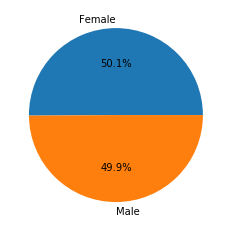

In [7]:
# Idea is,more the no of order by gender,more popular a supermarket is among that respective gender.

labels=[i for i ,df in df.groupby('Gender')]       #Creating labels for our Pie Chart
plt.pie(df['Gender'].value_counts(),labels=labels,autopct='%1.1f%%',startangle=0)   # Plotting a pie chart.
plt.show
print(df['Gender'].value_counts())     # Printing the values also

# Here,there is no considerable difference between males and females,so we can say supermarket is equally popular among the gender.

### 2.What does the customer rating look like and can you also comment on its skewness? 

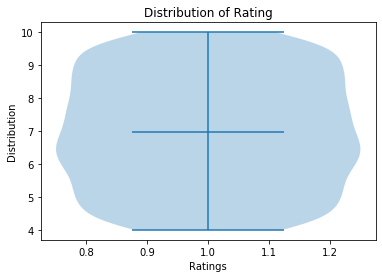

In [8]:
# Skewness can be checked by a violin plot

plt.violinplot(df['Rating'],showmeans=True)
plt.xlabel('Ratings')
plt.ylabel('Distribution')
plt.title('Distribution of Rating')
plt.show()

# Skewness of the plot is alomost 0,so we can conclude rating is almost normally distributed.

### 3.What can you say about the aggregate sales across the branches? 

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64


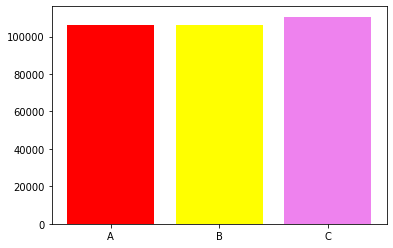

In [9]:
# Plotting a Bar Plot between Branch and total

branches=[branch for branch,df in df.groupby('Branch')]      # Making a list of branches
plt.bar(branches,df.groupby('Branch')['Total'].sum(),color=['red','yellow','violet'])  # Plotting a barplot

print(df.groupby('Branch')['Total'].sum())

# So, aggregate sales across the branches is nearly equal.


### 4.Which is the most popular payment method used by customers?

In [10]:
print(df['Payment'].value_counts())   

# Ewallet is most popular among the Payment method,followed by Cash and Credit Card.

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


# Part-3

### 1.Does gross income affect customer ratings? 

In [11]:
np.corrcoef(df['Rating'],df['gross income'])   # Getting correlation value.

# Correlation value is -0.03,very near to 0
# therefore,we conclude there is no relation between customer rating and gross income generated.

array([[ 1.       , -0.0364417],
       [-0.0364417,  1.       ]])

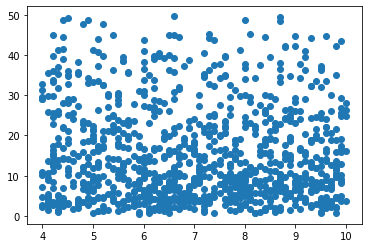

In [12]:
# Another way to check correlation is scatter plot.
# if y values are increasing/ddecreasing with x values, we conclude there is some relation between x and y,else no relation

plt.scatter(df['Rating'],df['gross income'])

# We can see that ,data is randomly spreaded ,therefore no relation between rating and gross income.

### 2.Which is the most profitable branch?

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64


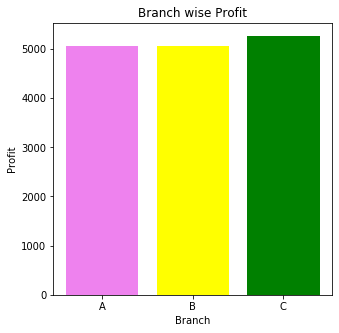

In [13]:
# Considering gross income as profit,
# Plotting the bar graph between branches and gross income

branches=[branch for branch,df in df.groupby('Branch')]    # Making a list of branches

plt.figure(figsize=(5,5))
plt.bar(branches,df.groupby('Branch')['gross income'].sum(),color=['violet','yellow','green'])  # Plotting a bar plot.
plt.xlabel('Branch')
plt.ylabel('Profit')
plt.title('Branch wise Profit')

print(df.groupby('Branch')['gross income'].sum())     # Also printing the values of each branch profit

### 3.How is the relationship between Gender and Gross income?

Gender
Female    7994.425
Male      7384.944
Name: gross income, dtype: float64


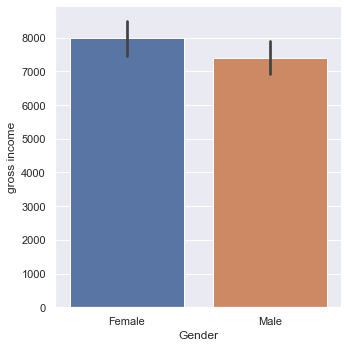

In [14]:
import seaborn as sns                             # Importing a seaborn library
sns.set(style='darkgrid')                         # Setting a style of graph('darkgrid')
sns.catplot(x='Gender',y='gross income',data=df,kind='bar',estimator=sum)  # Plotting a graph between Gender and gross income
print(df.groupby('Gender')['gross income'].sum()) # also printing total gross income wrt Gender

# From the graph we can conclude,gross income is getting generated more from females than that of males

### 4.Can you see any time trend in gross income? 

In [15]:
# Plotting a line graph for entire 3 months.
# for that,we need to first convert Date column to datetime column

df2=df.copy()                            # Copying the data
df2['Date']=pd.to_datetime(df2['Date'])  # Type of date column is object,we need to convert it into datetime
df2=df2.sort_values(by='Date')           # rearranging the data wrt date

df2.index=np.arange(1000)                # Providing a new index to our data(we gonna require it to add string format of date column)
df2.head(10)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating
0,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,8.448,6.3
1,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,29.583,7.7
2,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,19.036,5.7
3,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,5.408,6.9
4,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,6.287,5.0
5,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,2019-01-01,14:42,Credit card,742.20,37.110,4.3
6,C,Naypyitaw,Normal,Female,Electronic accessories,63.22,2,6.322,132.762,2019-01-01,15:51,Cash,126.44,6.322,8.5
7,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,2019-01-01,11:36,Credit card,846.30,42.315,9.0
8,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,2019-01-01,19:48,Credit card,369.80,18.490,7.0
9,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,2019-01-01,10:39,Credit card,435.66,21.783,6.9


In [16]:
# Here we are creating string format of dates

Date2=[]                               # Creating an empty list                              
for i in range(1000):                  # here,new index that we have defined earlier is useful
    Date2.append(str(df2['Date'][i]))  # adding a string format of dates

df2['Date2']=Date2                     # adding this column to our dataframe

df2['Date2'].head()

0    2019-01-01 00:00:00
1    2019-01-01 00:00:00
2    2019-01-01 00:00:00
3    2019-01-01 00:00:00
4    2019-01-01 00:00:00
Name: Date2, dtype: object

In [17]:
# Here,along with date,we have timestamp also
# To remove this timestamp,we need to split the string(splitting by 'space' present between date and timestamp)
# .apply() allows us to assign a function(here it is 'Lambda') to a data
# x.split splits the data by space(there is a space present in braces)
# and finally from splitted string,we are taking first string([0] takes first string)

df2['Date2']=df2['Date2'].apply(lambda x:x.split(' ')[0])   
df2['Date2'].head()

# Here we can see,timestamp is removed

0    2019-01-01
1    2019-01-01
2    2019-01-01
3    2019-01-01
4    2019-01-01
Name: Date2, dtype: object

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


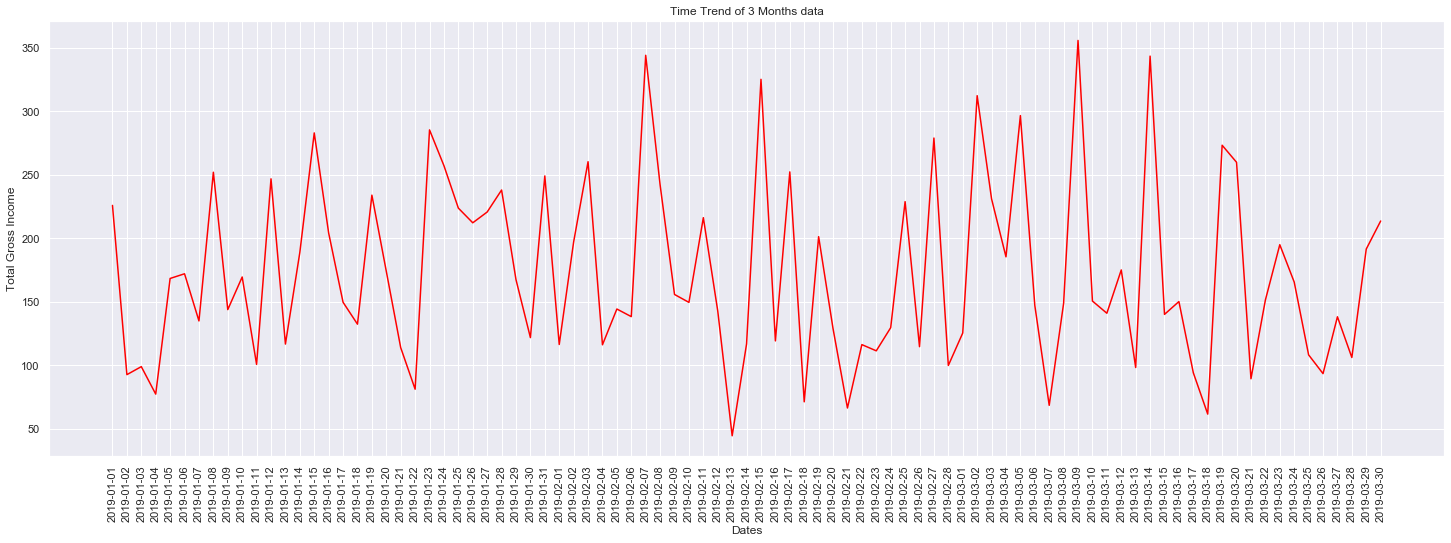

In [18]:
days=[day for day,df2 in df2.groupby('Date2')]                # grouping the date(type of 'Date' is an string,and list can be produced by an object,integer or a string but not by datetime)

plt.figure(figsize=(25,8))                                    # setting the size of our figure
plt.plot(days,df2.groupby('Date2')['gross income'].sum(),color='red')   # ploting a line graph of our total gross income
plt.xlabel('Dates')                                            # Setting x-label
plt.ylabel('Total Gross Income')                               # Setting y-label
plt.title('Time Trend of 3 Months data')                       # Setting Title of graph
plt.xticks(rotation='vertical')                                # Setting the position of x ticks(verticle)
plt.show()

# So,from the graph we do not see any perticular pattern.
# graph is very much similar to stocks

### 5.Which product line helps you generate the most income?

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64


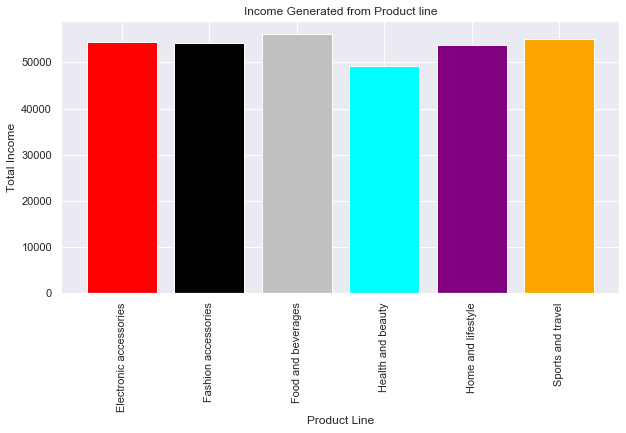

In [19]:
products=[product for product,df in df.groupby('Product line')]       # Making a list of products

plt.figure(figsize=(10,5))
plt.bar(products,df.groupby('Product line')['Total'].sum(),color=['red','black','silver','cyan','purple','orange']) # Plotting a barplot
plt.xlabel('Product Line')                       # Setting x-label
plt.ylabel('Total Income')                       # Setting y-label
plt.title('Income Generated from Product line')  # Setting title
plt.xticks(rotation='vertical')
print(df.groupby('Product line')['Total'].sum())   # Also printing a total value wrt product line

# so from the graph,we can clearly see that Fashin accessories helps you generate the most income

### 6.What is the spending pattern of both males and females, meaning in which category do they spend more? 

Male Expenditure wrt Product line
Electronic accessories    27235.5090
Fashion accessories       23868.4950
Food and beverages        22973.9265
Health and beauty         30632.7525
Home and lifestyle        23825.0355
Sports and travel         26548.1055
Name: Total, dtype: float64

 Female Expenditure wrt Product line
Electronic accessories    27102.0225
Fashion accessories       30437.4000
Food and beverages        33170.9175
Health and beauty         18560.9865
Home and lifestyle        30036.8775
Sports and travel         28574.7210
Name: Total, dtype: float64


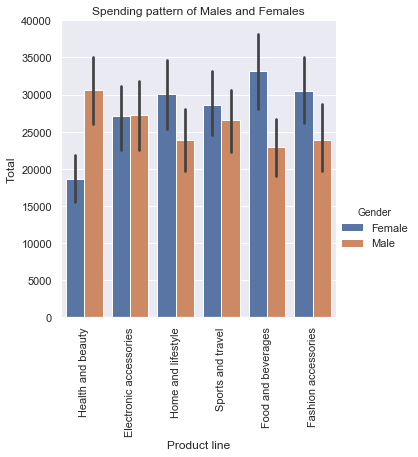

In [20]:
# We will plot the graph of total amount spent by respective gender wrt Profuct line
# x and y are product line and total amount respectively,hue divides the bars of bar plot wrt to gender.

sns.catplot(x='Product line',y='Total',data=df,hue='Gender',kind='bar',estimator=sum)   
plt.xticks(rotation=90)
plt.title('Spending pattern of Males and Females')

print('Male Expenditure wrt',df[df['Gender']=='Male'].groupby('Product line')['Total'].sum())
print('\n','Female Expenditure wrt',df[df['Gender']=='Female'].groupby('Product line')['Total'].sum())

# here we can see, in Health and beauty Male spend more than female and likewise we can see the rest of the categories.

### 7.How many products are bought by customers? 

In [21]:
print(df.groupby('Product line')['Quantity'].sum())
print('\n','Total Product Brought by customers are',df['Quantity'].sum())

Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64

 Total Product Brought by customers are 5510


### 8.Which day of the week has maximum sales? 

In [22]:
# First converting date column to datetime

df['Date']=pd.to_datetime(df['Date'])

# Getting a day of sale 
days=df['Date'].dt.dayofyear


Day=[]                # Creating an empty list and then adding days in it using for loop
for i in days:
    if i%7==1:
        Day.append('Tuesday')           # Day on the first day of sale is Tuesday
    elif i%7==2:
        Day.append('Wednesday')
    elif i%7==3:
        Day.append('Thirsday')
    elif i%7==4:
        Day.append('Friday')
    elif i%7==5:
        Day.append('Saturday')
    elif i%7==6:
        Day.append('Sunday')
    elif i%7==0:
        Day.append('Monday')

df['Day']=Day


In [23]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross income,Rating,Day
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,26.1415,9.1,Saturday
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,3.8200,9.6,Friday
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,16.2155,7.4,Sunday
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,23.2880,8.4,Sunday
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,30.2085,5.3,Friday


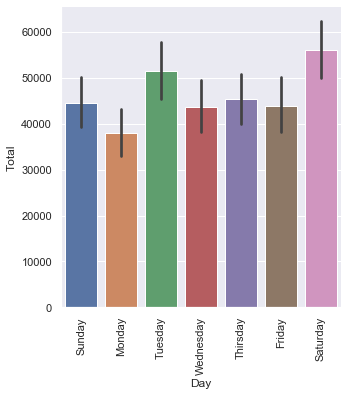

In [24]:
days=[day for day,df in df.groupby('Day')]   #Making a list of days

# Now Plotting a graph between day and Total sale.

sns.catplot(x='Day',y='Total',data=df,kind='bar',order=['Sunday','Monday','Tuesday','Wednesday','Thirsday','Friday','Saturday'],estimator=sum)
plt.xticks(rotation='vertical')
plt.show()

# From the barplot,we can say Saturday has maximum sales.

### 9.Which hour of the day is busiest? 

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


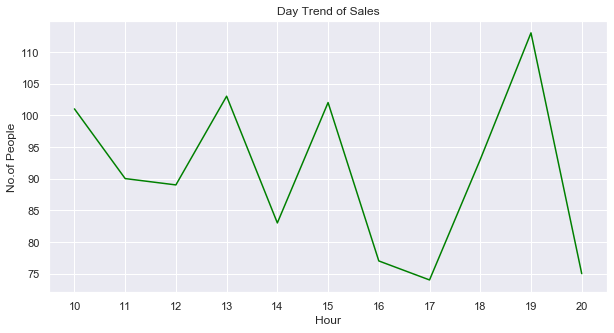

In [25]:
# Adding an hour column from Time column to our dataset
# Seperating first two values from Time column in string format
# Then converting that string to integer

df['Hour']=df['Time'].str[0:2].astype('int32')    # Adding an hour column
df['No. of People']=1                             # Adding another column to calculate no of people buying product at perticular hour
hours=[hour for hour,df in df.groupby('Hour')]    # making list of an hour
plt.figure(figsize=(10,5))
plt.plot(hours,df.groupby('Hour')['No. of People'].sum(),color='green')    # Ploting the graph
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('No.of People')
plt.title('Day Trend of Sales')
plt.grid(True)

# From the graph, we can say that between 18-19th hour most no of people are buying products.
# Therefor 6-7 PM is the busiest hour of the day 

### 10.Which product line should your supermarket focus on?

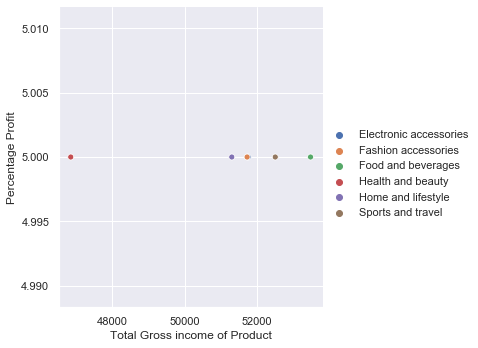

Profit Margin for Electronic accessories is 5.0%
Profit Margin for Fashion accessories is 5.0%
Profit Margin for Food and beverages is 5.0%
Profit Margin for Health and beauty is 5.0%
Profit Margin for Home and lifestyle is 5.0%


In [98]:
# Here we will compare a Cost price of a Product with its gross income
# If gross income is comaprably less for higher Cost Price(if profit margin is less),our supermarket need to focus on that perticular Product line

x=df.groupby('Product line')['cogs'].sum().values    # Grouping by Product line and summing a cost price and getting its values
y=(df.groupby('Product line')['gross income'].sum().values/df.groupby('Product line')['cogs'].sum().values)*100 # Dividing Profit values with its Cost Price

hue=[hue for hue,df in df.groupby('Product line')]

sns.relplot(x=x,y=y,data=df,kind='scatter',hue=hue)
plt.xlabel('Total Gross income of Product')
plt.ylabel('Percentage Profit')
plt.show()

for i in range(5):
    print('Profit Margin for {} is {}%'.format(hue[i],y[i]))
    
# Here, all the Product line are having profit margin of 5%,therefore all are performing well wrt each other.

### 11.Which city should be chosen for expansion and what products should be focussed on?

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64


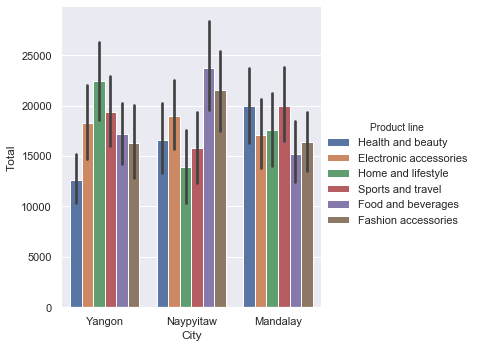

In [26]:
sns.catplot(x='City',y='Total',hue='Product line',data=df,kind='bar',estimator=sum)

print(df.groupby('City')['Total'].sum())

# ANSWER-1
# Mandalay is having overall lowest sales,and therefore should be chosen for expansion and product that should be focused on are Health and beauty,Food and beverages.
# However there is no significant difference between Mandalay and Yangon and as long as overall Sales are concerned,therefor Yangon should also be considered for expansion.

# ANSWER-2
# For Health and beauty Yangon is having lost sale and therefore Yangaon should be chosen for expansion.
# Similarly Mandalay should be chosen for Electronic accesories
# Naypyitaw for Home and lifestyle
# Naypyitaw for Sports and Travel
# Mandalay for Food and beverages
# Yangon for Fashion accessories